<a href="https://colab.research.google.com/github/asheerali/piaic_neuralnetworks/blob/main/DL_1_practical_example_with_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images,train_labels),(test_images,test_labels)= mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [3]:
test_labels.shape

(10000,)

In [4]:
test_labels[1]

2

Checking and ploting the image on a specific index

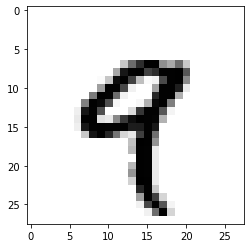

In [5]:
digit = train_images[4]
plt.imshow(digit,cmap= plt.cm.binary)
plt.show()

In [6]:
digit.shape

(28, 28)

In [7]:
train_labels[4]

9

Network Architecture


In [8]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

Compiling the Data

In [9]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Preparing the features (reshaping and normalizing)

In [10]:
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

Preparing the labels

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
train_labels=to_categorical(train_labels) #one hot encoding
test_labels=to_categorical(test_labels)

Training the model

In [13]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2565 - accuracy: 0.9250
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1038 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0691 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0503 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0373 - accuracy: 0.9889


Evaluation/Testing of our model

In [14]:
test_loss, test_acc = network.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0616 - accuracy: 0.9820


Predicting with our model

In [15]:
network.predict(test_images)

array([[2.46052312e-09, 3.75137352e-11, 2.28993443e-07, ...,
        9.99968767e-01, 1.02315312e-08, 4.01051956e-08],
       [1.98351335e-10, 2.48845777e-06, 9.99997377e-01, ...,
        2.70758264e-16, 3.38070869e-08, 2.90794013e-15],
       [3.08146859e-08, 9.98913646e-01, 1.44732530e-05, ...,
        6.87498832e-04, 3.23471497e-04, 7.67381323e-07],
       ...,
       [6.48349172e-15, 3.53277477e-11, 1.59535105e-13, ...,
        1.45950423e-06, 1.10919068e-07, 1.86608975e-06],
       [2.35763215e-11, 3.12401336e-13, 5.28935823e-14, ...,
        1.36713176e-11, 7.25482039e-07, 2.03962701e-13],
       [2.28867938e-10, 7.42975320e-16, 1.45002566e-09, ...,
        5.43462480e-16, 3.53347421e-11, 7.69185659e-13]], dtype=float32)

In [16]:
answers = network.predict(test_images)

In [17]:
digit = test_images[4]
digit.shape

(784,)

In [18]:
digit= digit.reshape(28,28)

In [19]:
digit.shape

(28, 28)

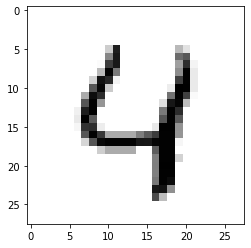

In [20]:
plt.imshow(digit, cmap= plt.cm.binary)
plt.show()

In [21]:
len(answers)

10000

In [22]:
answers.shape

(10000, 10)

In [23]:
answers[0]

array([2.4605231e-09, 3.7513735e-11, 2.2899344e-07, 3.1041636e-05,
       6.0952755e-14, 2.9277912e-08, 6.8638256e-15, 9.9996877e-01,
       1.0231531e-08, 4.0105196e-08], dtype=float32)

In [24]:
for i in range(len(answers)):
  reshaped_image=answers[i].reshape(28,28)
  plt.imshow(reshaped_image,cmap= plt.cm.binary)
  plt.show()

ValueError: ignored